
<h1 style="text-align: center;">CIÊNCIA DE DADOS</h1>
<h1 style="text-align: center;">Roteiro de Atividade Prática</h1>
<br>
<br>

Nome: ______________________________________________________________________________________      

Turma: ______________


**Componente:** Matemática e Estatística para Ciência de Dados 
<br>
**Unidade Curricular:** Estatística Aplicada
<br>
**Tema da Semana:** Inferência Estatística: Intervalos de Confiança I
<br>


# Aula 2

## Tarefa
- Execute o código abaixo.

- Se as bibliotecas não tiverem instaladas, instale-as.

- Acompanhe as instruções.

- Preencha o código onde está #TO DO

- Responda as perguntas e conclua a atividade


#### **Exemplo 1: Estimando a Média de Vendas Mensais**

Uma loja deseja estimar a média mensal de vendas de um produto. Com base em 40 meses de dados, a média observada foi de 500 unidades vendidas, com um desvio padrão populacional de 50 unidades. Calcule um intervalo de confiança de 95% para a média real de vendas.

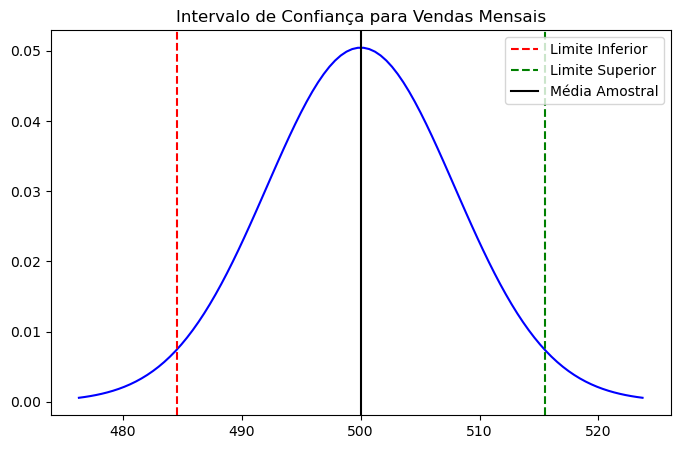

Intervalo de Confiança: (484.51, 515.49)


In [20]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Dados
media_amostral = 500
sigma = 50
n = 40
confianca = 0.95
z = stats.norm.ppf((1 + confianca) / 2)

# Cálculo do Intervalo de Confiança
erro_padrao = sigma / np.sqrt(n)
limite_inferior = media_amostral - z * erro_padrao
limite_superior = media_amostral + z * erro_padrao

# Gráfico
plt.figure(figsize=(8,5))
x = np.linspace(media_amostral - 3*erro_padrao, media_amostral + 3*erro_padrao, 100)
y = stats.norm.pdf(x, media_amostral, erro_padrao)
plt.plot(x, y, color='blue')
plt.axvline(limite_inferior, color='red', linestyle='dashed', label='Limite Inferior')
plt.axvline(limite_superior, color='green', linestyle='dashed', label='Limite Superior')
plt.axvline(media_amostral, color='black', linestyle='solid', label='Média Amostral')
plt.legend()
plt.title("Intervalo de Confiança para Vendas Mensais")
plt.show()

print(f"Intervalo de Confiança: ({limite_inferior:.2f}, {limite_superior:.2f})")

#### **Perguntas: (responda com o professor)**

1. **Como interpretar esse intervalo de confiança no contexto do problema?**



2. **O que aconteceria com o intervalo se coletássemos mais meses de dados?**



---

#### **Exemplo 2: Tempo Médio de Atendimento em um Hospital**

Um hospital deseja saber quanto tempo, em média, um paciente espera para ser atendido. Uma amostra de 25 pacientes revelou uma média de 30 minutos com um desvio padrão amostral de 8 minutos. Determine um intervalo de confiança de 95% para o tempo médio de espera.

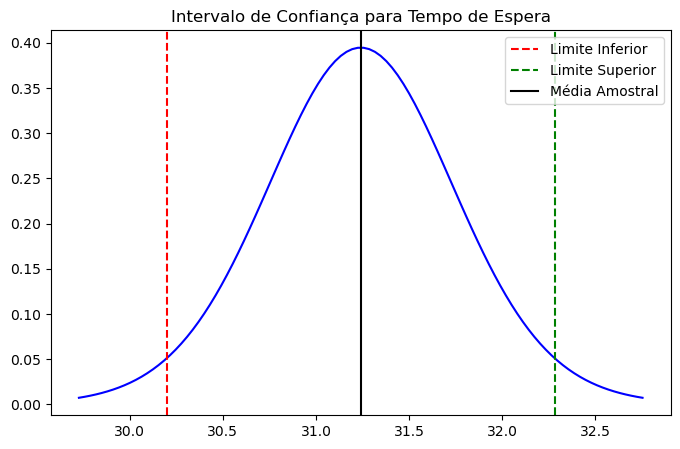

Intervalo de Confiança: (30.20, 32.28)


In [25]:
#Dados
amostra = [30, 32, 28, 35, 31, 29, 34, 36, 30, 32, 33, 31, 28, 29, 34, 30, 27, 32, 30, 31, 33, 28, 29, 35, 34]
n = len(amostra)
media_amostral = np.mean(amostra)
desvio_amostral = np.std(amostra, ddof=1)
confianca = 0.95
t = stats.t.ppf((1 + confianca) / 2, df=n-1)

# Cálculo do Intervalo de Confiança
erro_padrao = desvio_amostral / np.sqrt(n)
limite_inferior = media_amostral - t * erro_padrao
limite_superior = media_amostral + t * erro_padrao

# Gráfico
plt.figure(figsize=(8,5))
x = np.linspace(media_amostral - 3*erro_padrao, media_amostral + 3*erro_padrao, 100)
y = stats.t.pdf((x - media_amostral) / erro_padrao, df=n-1)
plt.plot(x, y, color='blue')
plt.axvline(limite_inferior, color='red', linestyle='dashed', label='Limite Inferior')
plt.axvline(limite_superior, color='green', linestyle='dashed', label='Limite Superior')
plt.axvline(media_amostral, color='black', linestyle='solid', label='Média Amostral')
plt.legend()
plt.title("Intervalo de Confiança para Tempo de Espera")
plt.show()

print(f"Intervalo de Confiança: ({limite_inferior:.2f}, {limite_superior:.2f})")

#### **Perguntas: (responda com o professor)**

1. **Por que utilizamos a distribuição t-Student neste caso?**



2. **Como o desvio padrão da amostra afeta o intervalo de confiança?**


---

#### **Exemplo 3: Intervalo de Confiança Usando SciPy**

O Python possui funções prontas para calcular intervalos de confiança, facilitando a análise de dados. Vamos estimar um intervalo de confiança para a média de um conjunto de dados fictício.

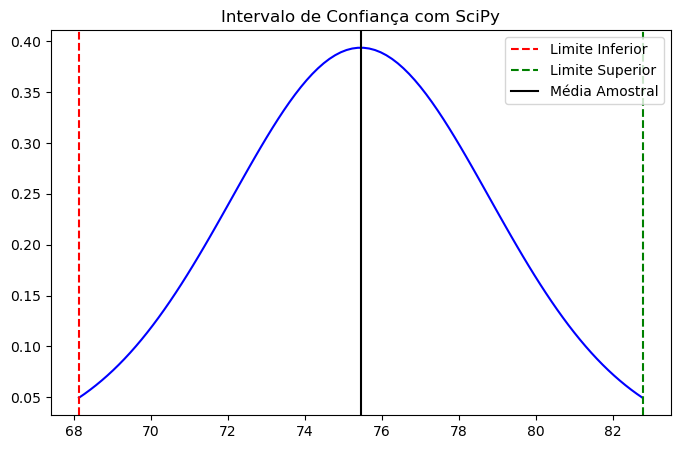

Intervalo de Confiança: (68.13, 82.77)


In [28]:
def intervalo_confianca(amostra, confianca=0.95):
    n = len(amostra)
    media = np.mean(amostra)
    desvio = np.std(amostra, ddof=1)
    t = stats.t.ppf((1 + confianca) / 2, df=n-1)
    erro_padrao = desvio / np.sqrt(n)
    return media - t * erro_padrao, media + t * erro_padrao

# Exemplo
dados = np.random.randint(50, 100, 20)
lim_inf, lim_sup = intervalo_confianca(dados)

# Gráfico
plt.figure(figsize=(8,5))
x = np.linspace(lim_inf, lim_sup, 100)
y = stats.t.pdf((x - np.mean(dados)) / (np.std(dados, ddof=1) / np.sqrt(len(dados))), df=len(dados)-1)
plt.plot(x, y, color='blue')
plt.axvline(lim_inf, color='red', linestyle='dashed', label='Limite Inferior')
plt.axvline(lim_sup, color='green', linestyle='dashed', label='Limite Superior')
plt.axvline(np.mean(dados), color='black', linestyle='solid', label='Média Amostral')
plt.legend()
plt.title("Intervalo de Confiança com SciPy")
plt.show()

print(f"Intervalo de Confiança: ({lim_inf:.2f}, {lim_sup:.2f})")

#### **Exemplo 4: Pesquisando a Satisfação dos Clientes**

Uma empresa realizou uma pesquisa com 35 clientes sobre a satisfação de um serviço, com respostas em uma escala de 1 a 10. A média das avaliações foi de 7.5 e o desvio padrão foi de 1.2. Calcule o intervalo de confiança de 95% para a satisfação média dos clientes.

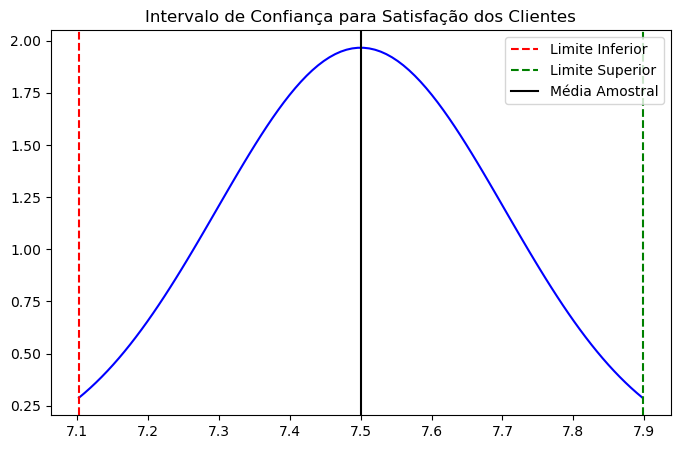

Intervalo de Confiança: (7.10, 7.90)


In [36]:
# Dados
media_amostral = 7.5
desvio_padrao = 1.2
n = 35
confianca = 0.95
z = stats.norm.ppf((1 + confianca) / 2)

# Cálculo do Intervalo de Confiança
erro_padrao = desvio_padrao / np.sqrt(n)
limite_inferior = media_amostral - z * erro_padrao
limite_superior = media_amostral + z * erro_padrao

# Gráfico
plt.figure(figsize=(8,5))
x = np.linspace(limite_inferior, limite_superior, 100)
y = stats.norm.pdf(x, media_amostral, erro_padrao)
plt.plot(x, y, color='blue')
plt.axvline(limite_inferior, color='red', linestyle='dashed', label='Limite Inferior')
plt.axvline(limite_superior, color='green', linestyle='dashed', label='Limite Superior')
plt.axvline(media_amostral, color='black', linestyle='solid', label='Média Amostral')
plt.legend()
plt.title("Intervalo de Confiança para Satisfação dos Clientes")
plt.show()

print(f"Intervalo de Confiança: ({limite_inferior:.2f}, {limite_superior:.2f})")